In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install tensorflow

In [ ]:
pip install FER


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 21.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6082 sha256=e74c3b5ff49c9d94630c44c577379a808b8acc668b890ae9de73a8932631bcb9
  Stored in directory: /root/.cache/pip/wheels/8e/7a/69/cd6aeb83b126a7f04cbe7c9d929028dc52a6e7d525ff56003a
Successfully built ffmpeg


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score

# Define the base folder containing class subfolders
base_folder = '/content/drive/MyDrive/PROJECT1/images'

# Load and preprocess dataset
data_generator = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2)

train_generator = data_generator.flow_from_directory(
    base_folder,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = data_generator.flow_from_directory(
    base_folder,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Create a neural network model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')  # Output neurons based on the number of classes
])

# Compile the model with the Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    validation_data=val_generator,
    validation_steps=val_generator.samples // 32,
    epochs=25  # You can increase the number of epochs if needed
)

# Evaluate the model on the validation data
val_loss, val_accuracy = model.evaluate(val_generator)
print("Validation Accuracy:", val_accuracy)
#This code will correctly evaluate and print the validation accuracy after training.







Found 133 images belonging to 19 classes.
Found 19 images belonging to 19 classes.
Epoch 1/25
4/4 [==============================] - 67s 17s/step - loss: 2.9603 - accuracy: 0.0396
Epoch 2/25
4/4 [==============================] - 8s 3s/step - loss: 2.9599 - accuracy: 0.0396
Epoch 3/25
4/4 [==============================] - 9s 2s/step - loss: 2.9459 - accuracy: 0.0312
Epoch 4/25
4/4 [==============================] - 8s 2s/step - loss: 2.9174 - accuracy: 0.0693
Epoch 5/25
4/4 [==============================] - 8s 2s/step - loss: 2.8950 - accuracy: 0.0792
Epoch 6/25
4/4 [==============================] - 8s 2s/step - loss: 2.8574 - accuracy: 0.0792
Epoch 7/25
4/4 [==============================] - 8s 2s/step - loss: 2.8301 - accuracy: 0.1386
Epoch 8/25
4/4 [==============================] - 8s 3s/step - loss: 2.7435 - accuracy: 0.1683
Epoch 9/25
4/4 [==============================] - 8s 3s/step - loss: 2.6224 - accuracy: 0.1980
Epoch 10/25
4/4 [==============================] - 8s 2s/ste

Epoch 1/25
4/4 [==============================] - 12s 3s/step - loss: 1.3760 - accuracy: 0.5644
Epoch 2/25
4/4 [==============================] - 8s 3s/step - loss: 1.0900 - accuracy: 0.6238
Epoch 3/25
4/4 [==============================] - 6s 2s/step - loss: 0.9733 - accuracy: 0.7030
Epoch 4/25
4/4 [==============================] - 7s 2s/step - loss: 0.8385 - accuracy: 0.7426
Epoch 5/25
4/4 [==============================] - 9s 3s/step - loss: 0.7082 - accuracy: 0.7624
Epoch 6/25
4/4 [==============================] - 11s 3s/step - loss: 0.6246 - accuracy: 0.7734
Epoch 7/25
4/4 [==============================] - 8s 2s/step - loss: 0.6051 - accuracy: 0.7723
Epoch 8/25
4/4 [==============================] - 11s 3s/step - loss: 0.4965 - accuracy: 0.8438
Epoch 9/25
4/4 [==============================] - 12s 3s/step - loss: 0.4665 - accuracy: 0.8911
Epoch 10/25
4/4 [==============================] - 9s 3s/step - loss: 0.5195 - accuracy: 0.8317
Epoch 11/25
4/4 [============================

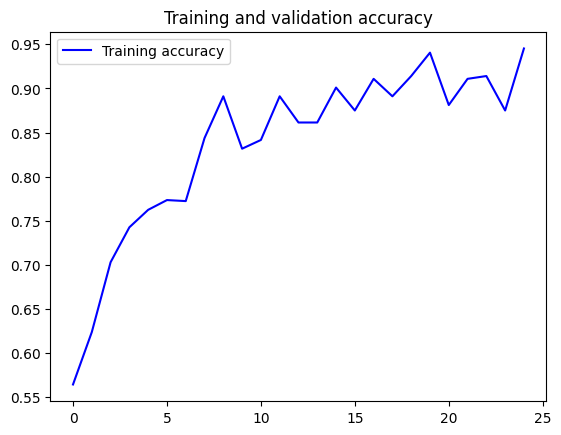

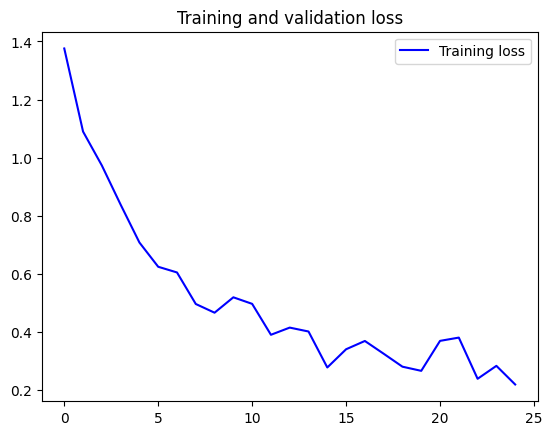

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt  # Add this import for plotting

# ... (Your previous code for data loading and model creation) ...

# Compile the model with the Adam optimizer and specify metrics=['accuracy']
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    validation_data=val_generator,
    validation_steps=val_generator.samples // 32,
    epochs=25 # You can increase the number of epochs if needed
)

# Extract training and validation accuracy and loss
accuracy = history.history['accuracy']
val_accuracy = history.history.get('val_accuracy')  # Use .get() to avoid KeyError

loss = history.history['loss']
val_loss = history.history.get('val_loss')  # Use .get() to avoid KeyError

epochs = range(len(accuracy))

# Plot training and validation accuracy
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
if val_accuracy is not None:
    plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

# Plot training and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
if val_loss is not None:
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


Found 133 images belonging to 19 classes.
Found 19 images belonging to 19 classes.
4/4 [==============================] - 11s 3s/step - loss: 0.5244 - accuracy: 0.9505


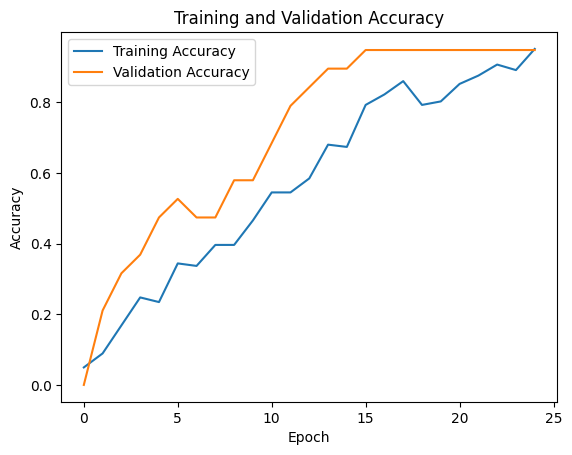

1/1 [==============================] - 2s 2s/step - loss: 0.3734 - accuracy: 0.9474
Validation Accuracy: 0.9473684430122375
1/1 [==============================] - 2s 2s/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         1
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       1.00      1.00      1.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          17       1.00      1.00      1.00         1
          18       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Define the base folder containing class subfolders
base_folder = '/content/drive/MyDrive/PROJECT1/images'

# Load and preprocess dataset
data_generator = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2)

train_generator = data_generator.flow_from_directory(
    base_folder,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = data_generator.flow_from_directory(
    base_folder,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Create a base VGG16 model for feature extraction
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Freeze the weights of the base model
for layer in base_model.layers:
    layer.trainable = False

# Build a new model on top of the base model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Global Average Pooling layer
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')
])

# Compile the model with the Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Initialize lists to store training history
train_accuracy = []
val_accuracy = []

# Train the model
for epoch in range(25):  # You can increase the number of epochs if needed
    history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // 32,
        validation_data=val_generator,
        validation_steps=val_generator.samples // 32,
        epochs=1  # Train for one epoch at a time
    )

    # Append the training accuracy for this epoch
    train_accuracy.append(history.history['accuracy'][0])

    # Calculate and append the validation accuracy for this epoch
    val_generator.reset()
    val_accuracy_epoch = model.evaluate(val_generator, steps=len(val_generator), verbose=0)[1]
    val_accuracy.append(val_accuracy_epoch)

# Plot training and validation accuracy
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Evaluate the model on the validation data
val_loss, val_acc = model.evaluate(val_generator)
print("Validation Accuracy:", val_acc)

# Predict labels on the validation data
val_generator.reset()
y_true = val_generator.classes
y_pred = model.predict(val_generator, steps=len(val_generator), verbose=1)
y_pred = np.argmax(y_pred, axis=1)

# Print classification report
class_names = list(val_generator.class_indices.keys())
print(classification_report(y_true, y_pred, target_names=class_names))

# Plot confusion matrix


Found 133 images belonging to 19 classes.
Found 19 images belonging to 19 classes.
4/4 [==============================] - 11s 3s/step - loss: 0.4817 - accuracy: 0.9010


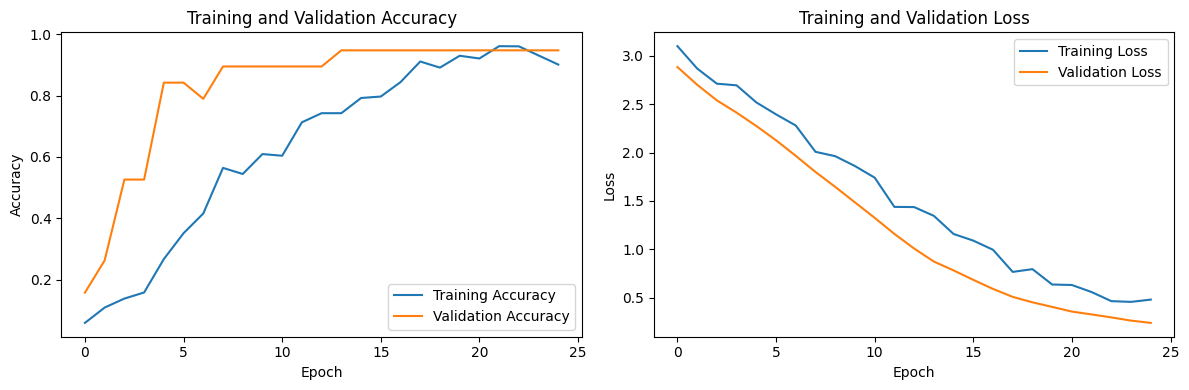

1/1 [==============================] - 2s 2s/step - loss: 0.2412 - accuracy: 0.9474
Validation Accuracy: 0.9473684430122375
1/1 [==============================] - 2s 2s/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


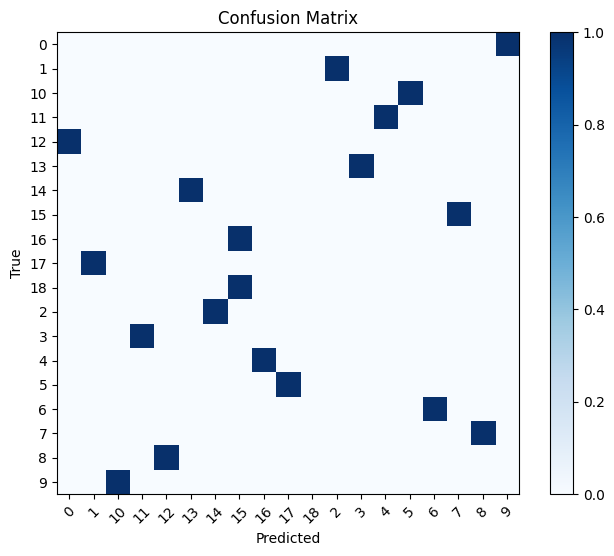

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Define the base folder containing class subfolders
base_folder = '/content/drive/MyDrive/PROJECT1/images'

# Load and preprocess dataset
data_generator = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2)

train_generator = data_generator.flow_from_directory(
    base_folder,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = data_generator.flow_from_directory(
    base_folder,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Create a base VGG16 model for feature extraction
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Freeze the weights of the base model
for layer in base_model.layers:
    layer.trainable = False

# Build a new model on top of the base model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Global Average Pooling layer
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')
])

# Compile the model with the Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Initialize lists to store training history
train_accuracy = []
val_accuracy = []
train_loss = []
val_loss = []

# Train the model
for epoch in range(25):  # You can increase the number of epochs if needed
    history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // 32,
        validation_data=val_generator,
        validation_steps=val_generator.samples // 32,
        epochs=1  # Train for one epoch at a time
    )

    # Append the training accuracy and loss for this epoch
    train_accuracy.append(history.history['accuracy'][0])
    train_loss.append(history.history['loss'][0])

    # Calculate and append the validation accuracy and loss for this epoch
    val_generator.reset()
    val_metrics = model.evaluate(val_generator, steps=len(val_generator), verbose=0)
    val_accuracy.append(val_metrics[1])
    val_loss.append(val_metrics[0])

# Plot training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()

# Evaluate the model on the validation data
val_loss, val_acc = model.evaluate(val_generator)
print("Validation Accuracy:", val_acc)

# Predict labels on the validation data
val_generator.reset()
y_true = val_generator.classes
y_pred = model.predict(val_generator, steps=len(val_generator), verbose=1)
y_pred = np.argmax(y_pred, axis=1)

# Print classification report
class_names = list(val_generator.class_indices.keys())
print(classification_report(y_true, y_pred, target_names=class_names))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
